# Waste

Grace Chen(z5470479)

from [National Waste Data](https://www.dcceew.gov.au/environment/protection/waste/national-waste-reports/2022)

# #Stuff

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import seaborn as sns
import os
from datetime import datetime

waste_data = pd.read_excel(r"C:/Users/grace/Desktop/waste_data.xlsx")

In [3]:
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (10, 5)

In [5]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [6]:
filepath = "waste_data.xlsx"
waste_data = pd.read_excel(filepath, sheet_name="Database 2022")

C:\Users\grace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [7]:
def year_string_to_timesamp(year_string):
    year = int(year_string.split('-')[0])
    return pd.Timestamp(year=year, month=1, day=1, hour=0, minute=0)

waste_data["year_dt"] = waste_data.Year.apply(year_string_to_timesamp)
waste_data.head()

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,,year_dt
0,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01
1,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Recycling,Recycling,0.000000,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01
2,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Other disposal,Disposal,20185.549742,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01
3,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Recycling,Recycling,0.000000,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01
4,2020-2021,ACT,Biosolids,NaN,Category,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN,2020-01-01


In [8]:
waste_data.sample(5)
#gives you a random file code(usually the first data of is an outlier to the rest)

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,,year_dt
28494,2015-2016,NSW,Plastics,NaN,Category,NaN,C&I,Landfill,Disposal,452600.000000,Core waste,03 C&I core,05 Plastics,C5,NaN,NaN,,2015-01-01
25989,2016-2017,Tas,Total,NaN,Total,All other waste total,C&D,Landfill,Energy recovery,176.000000,Core waste,02 C&D,11 Total,C11,NaN,NaN,,2016-01-01
28074,2015-2016,NSW,Hazardous wastes,"Food-derived hazardous wastes (K100, K110)",Type,NaN,C&D,Recycling,Recycling,0.000000,Core waste,02 C&D,09 Hazardous wastes,C9,"41 Food-derived hazardous wastes (K100, K110)",T41,NaN,2015-01-01
61863,2008-2009,Tas,Hazardous wastes,Reactive chemicals (E),Type,NaN,C&I,Treatment,Disposal,6.512216,Core waste,03 C&I core,09 Hazardous wastes,C9,36 Reactive chemicals (E),T36,NaN,2008-01-01
38595,2013-2014,NT,Hazardous wastes,Acids (B),Type,NaN,Total,Recycling,Recycling,24.995105,Core waste,09 Total,09 Hazardous wastes,C9,33 Acids (B),T33,NaN,2013-01-01


In [9]:
waste_data.columns
#gets the coloumn out - good for changing the name of the coloumn

Index(['Year', 'Jurisdiction', 'Category', 'Type', 'Classification',
       'Total type', 'Stream', 'Management', 'Fate', 'Tonnes',
       'Core or non-core', 'Sub-stream', 'Cat. order', 'Cat. no.',
       'Type order', 'Type no.', ' ', 'year_dt'],
      dtype='object')

In [10]:
row_one = waste_data.iloc[1]
row_one
#index locator - makes data like a list
#Nan = N/A

Year                          2020-2021
Jurisdiction                        ACT
Category                      Biosolids
Type                          Biosolids
Classification                     Type
Total type                          NaN
Stream                              C&I
Management                    Recycling
Fate                          Recycling
Tonnes                              0.0
Core or non-core             Core waste
Sub-stream                  03 C&I core
Cat. order                  03 Organics
Cat. no.                             C3
Type order                 14 Biosolids
Type no.                            T14
                                    NaN
year_dt             2020-01-01 00:00:00
Name: 1, dtype: object

In [11]:
df = pd.DataFrame(waste_data) # filtering out the Total/Australia stuff out of df
condition = ~((waste_data['Classification'] == 'Total') & (waste_data['Classification'] == 'Type'))

filtered_waste_df = df[condition]

In [12]:
filtered_waste_df.sample(5)

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,,year_dt
61836,2008-2009,Tas,Hazardous wastes,Plating and heat treatment (A),Type,NaN,C&D,Landfill,Disposal,0.000000e+00,Core waste,02 C&D,09 Hazardous wastes,C9,32 Plating and heat treatment (A),T32,NaN,2008-01-01
62815,2008-2009,WA,Glass,NaN,Category,NaN,C&I,Recycling,Recycling,0.000000e+00,Core waste,03 C&I core,06 Glass,C6,NaN,NaN,NaN,2008-01-01
57136,2009-2010,Vic,Ash,Ash,Type,NaN,Total,Other disposal,Long-term storage,1.316076e+06,Non-core waste,09 Total,08 Ash,C8,31 Ash,T31,NaN,2009-01-01
39653,2013-2014,Qld,Paper & cardboard,NaN,Category,NaN,C&D,Energy from waste facility,Energy recovery,0.000000e+00,Core waste,02 C&D,04 Paper & cardboard,C4,NaN,NaN,NaN,2013-01-01
11151,2019-2020,Vic,Unclassified materials,Unclassified materials,Type,NaN,MSW,Recycling,Recycling,0.000000e+00,Core waste,01 MSW,10 Unclassified materials,C10,51 Unclassified materials,T51,NaN,2019-01-01


# How does Australia's Waste System change from 2013-2020?

As we all know, Australia, like many other nations, faces significant challenges when it comes to managing and mitigating waste. With the rise of consumerism and industrial activity, the impact on our environment has become more pronounced, making it crucial for us to understand and address the intricacies of waste management.

In this presentation, I aim to provide a comprehensive overview of the current state of waste management in Australia. We will explore **key statistics, emerging trends, and the effectiveness of existing waste management strategies.** By examining these factors, we will uncover **areas of concern as well as opportunities for improvement.**

The data I have used it from the National Wate Report of 2022. It has gathered data about Australia’s waste generation, recovery and fate for all waste streams and various material categories since 2006

In [13]:
filtered_waste_df.columns

Index(['Year', 'Jurisdiction', 'Category', 'Type', 'Classification',
       'Total type', 'Stream', 'Management', 'Fate', 'Tonnes',
       'Core or non-core', 'Sub-stream', 'Cat. order', 'Cat. no.',
       'Type order', 'Type no.', ' ', 'year_dt'],
      dtype='object')

This is how the data is categorised. The most important things to note are **Jurisdiction**(state/territory), **Category**(a broad classification on the type of material collected), **Type**(a more detailed subcategory of waste collected),  **Stream**(source of waste), **Management and Fate**(where and how waste is dealt with).

Description of Data Fields Used in National Waste Data


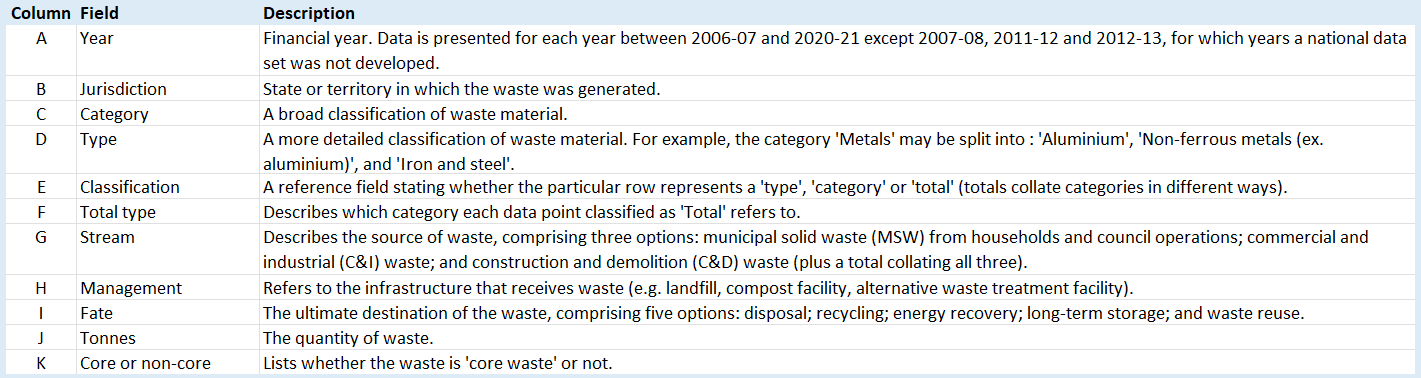

In [14]:
print("Description of Data Fields Used in National Waste Data")
from IPython.display import Image
with open('Data fields.png','rb') as file:
    display(Image(file.read()))
    

The waste_data includes totals of particular categories which included waste that are not categorised clearly as different jurisdiction have different classification systems. Thus, I've excluded those rows to give more focused results, and not double up the numbers which are inclusive of existing data.

In [15]:
row_one = filtered_waste_df.iloc[1]
row_one

Year                          2020-2021
Jurisdiction                        ACT
Category                      Biosolids
Type                          Biosolids
Classification                     Type
Total type                          NaN
Stream                              C&I
Management                    Recycling
Fate                          Recycling
Tonnes                              0.0
Core or non-core             Core waste
Sub-stream                  03 C&I core
Cat. order                  03 Organics
Cat. no.                             C3
Type order                 14 Biosolids
Type no.                            T14
                                    NaN
year_dt             2020-01-01 00:00:00
Name: 1, dtype: object

Here is a sample of the data

In [16]:
filtered_waste_df.sample(5)

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,,year_dt
54962,2009-2010,NT,Hazardous wastes,"Paints, resins, inks, organic sludges (F)",Type,NaN,C&D,Treatment,Energy recovery,0.000000,Core waste,02 C&D,09 Hazardous wastes,C9,"37 Paints, resins, inks, organic sludges (F)",T37,NaN,2009-01-01
13172,2018-2019,NSW,Organics,NaN,Category,NaN,C&I,Anaerobic digestion,Recycling,43968.000000,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,,2018-01-01
12268,2018-2019,ACT,Hazardous wastes,Plating and heat treatment (A),Type,NaN,C&I,Treatment,Recycling,0.000000,Core waste,03 C&I core,09 Hazardous wastes,C9,32 Plating and heat treatment (A),T32,NaN,2018-01-01
3278,2020-2021,SA,Hazardous wastes,Asbestos (N220),Type,NaN,C&D,Treatment,Disposal,433.816487,Core waste,02 C&D,09 Hazardous wastes,C9,45 Asbestos (N220),T45,NaN,2020-01-01
7136,2019-2020,NSW,Hazardous wastes,Organic solvents (G),Type,NaN,C&I,Landfill,Disposal,0.000000,Core waste,03 C&I core,09 Hazardous wastes,C9,38 Organic solvents (G),T38,NaN,2019-01-01


The data logs data in the timeframe of each financial year from 2006/7. However, for whatever reason, they did not collect data from the periods of 2007-8, 20011-12 and 2012-13. 

There is just under 71 thousand, 500 rows of data with 11 main columns.

I also made separate data frames for each jurisdiction:

In [17]:
df = pd.DataFrame(filtered_waste_df)

nsw_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'NSW']
wa_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'WA']
vic_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'Vic']
qld_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'Qld']
act_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'ACT']
tas_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'Tas']
nt_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'NT']
sa_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'SA']

# BETWEEN 2013-2020?????????????????

In [18]:
df1 = pd.DataFrame(act_data)
df1 = act_data[(act_data['year_dt'] >= '2013-01-01') & (act_data['year_dt'] <= '2020-12-31')]

df2 = pd.DataFrame(vic_data)
df2 = vic_data[(vic_data['year_dt'] >= '2013-01-01') & (vic_data['year_dt'] <= '2020-12-31')]

df3 = pd.DataFrame(nsw_data)
df3 = nsw_data[(nsw_data['year_dt'] >= '2013-01-01') & (nsw_data['year_dt'] <= '2020-12-31')]

df4 = pd.DataFrame(wa_data)
df4 = wa_data[(wa_data['year_dt'] >= '2013-01-01') & (wa_data['year_dt'] <= '2020-12-31')]

df5 = pd.DataFrame(sa_data)
df5 = sa_data[(sa_data['year_dt'] >= '2013-01-01') & (sa_data['year_dt'] <= '2020-12-31')]

df6 = pd.DataFrame(tas_data)
df6 = tas_data[(tas_data['year_dt'] >= '2013-01-01') & (tas_data['year_dt'] <= '2020-12-31')]

df7 = pd.DataFrame(nt_data)
df7 = nt_data[(nt_data['year_dt'] >= '2013-01-01') & (nt_data['year_dt'] <= '2020-12-31')]

df8 = pd.DataFrame(qld_data)
df8 = qld_data[(qld_data['year_dt'] >= '2013-01-01') & (qld_data['year_dt'] <= '2020-12-31')]

To find out how Australia's Waste System change from 2013-2020, let's get general overview of the current waste scene

# Q: What creates the most WASTE? 

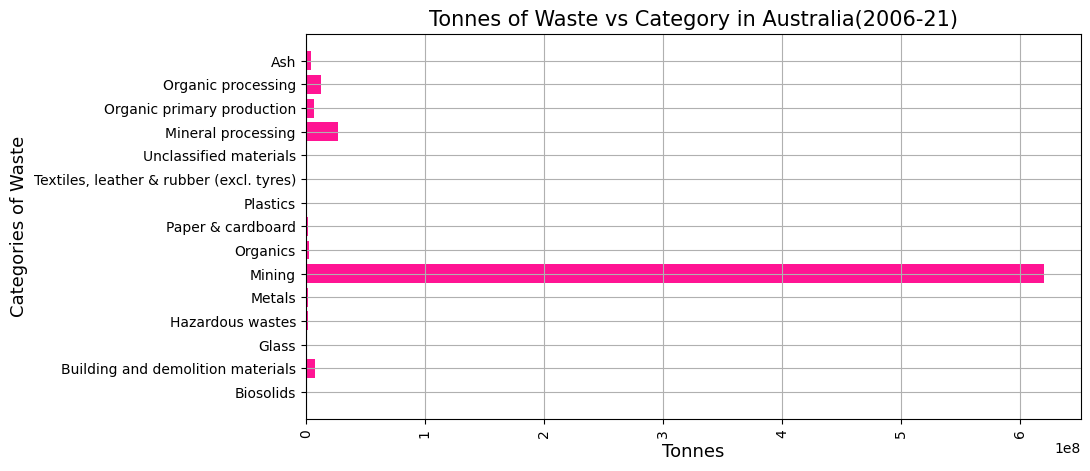

In [56]:
df = pd.DataFrame(waste_data) # filtering out the Total/Australia stuff out of df
condition = ~((waste_data['Category'] == 'Total'))

filtered_waste_df = df[condition]

plt.figure()
plt.barh(filtered_waste_df['Category'], filtered_waste_df['Tonnes'], color='deeppink')
plt.tick_params(axis='x', labelrotation=90)
plt.title("Tonnes of Waste vs Category in Australia(2006-21)", fontsize=15)
plt.xlabel("Tonnes", fontsize=13)
plt.ylabel("Categories of Waste", fontsize=13)
plt.grid(True)
plt.show()
plt.show()

# Q: WHICH JURISDICTION creates the most WASTE?

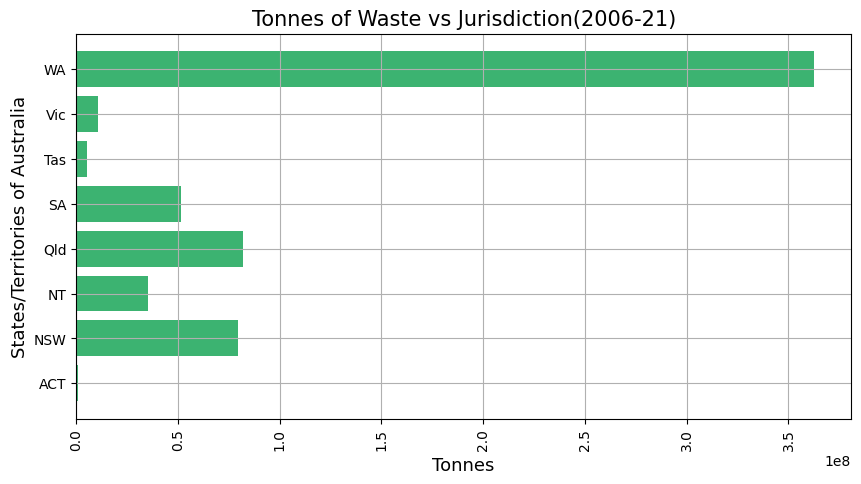

In [57]:
df = pd.DataFrame(waste_data) # filtering out the Total/Australia stuff out of df
condition = ~((waste_data['Jurisdiction'] == 'Australia'))

filtered_waste_df = df[condition]

plt.figure()
plt.barh(filtered_waste_df['Jurisdiction'], filtered_waste_df['Tonnes'], color='mediumseagreen')
plt.tick_params(axis='x', labelrotation=90)

plt.title("Tonnes of Waste vs Jurisdiction(2006-21)", fontsize=15)
plt.xlabel("Tonnes", fontsize=13)
plt.ylabel("States/Territories of Australia", fontsize=13)
plt.grid(True)

plt.show()

# Q: What type of waste is created in Australia as a whole?

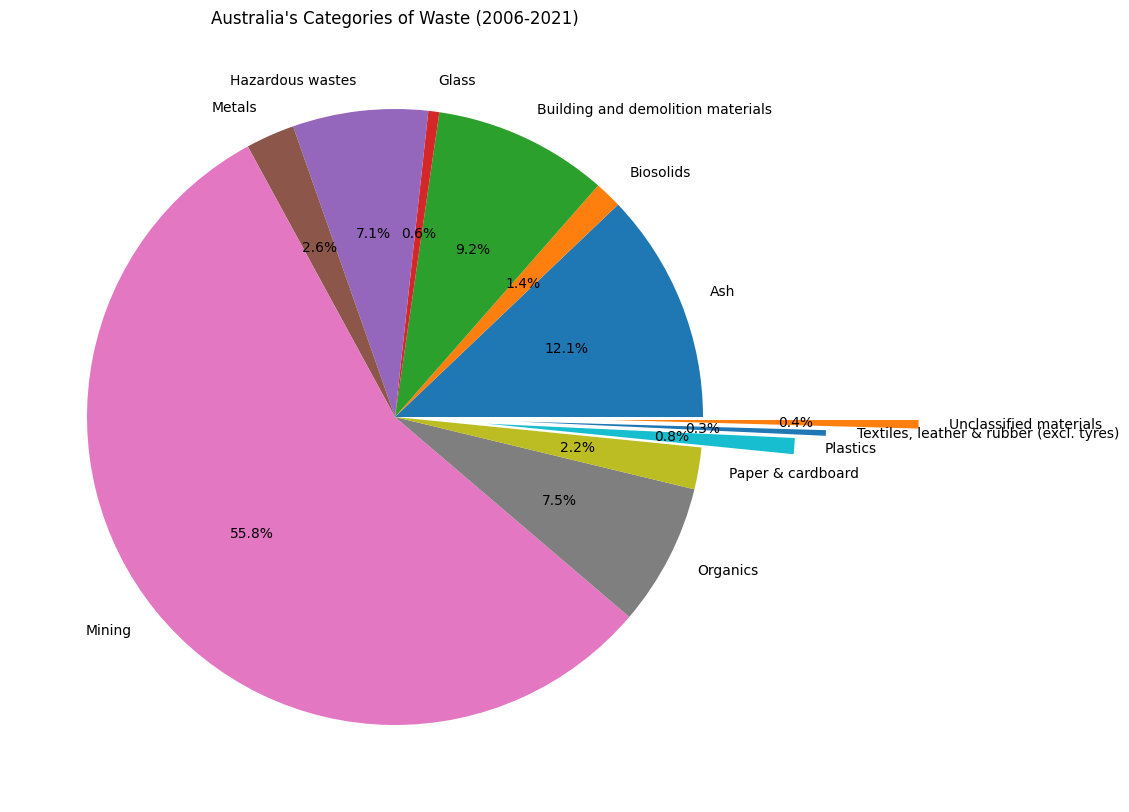

In [85]:
df = pd.DataFrame(filtered_waste_df)
condition = ~((filtered_waste_df['Category'] == 'Total'))

filtered_waste_df = df[condition]

df_positive = filtered_waste_df[filtered_waste_df['Tonnes'] >= 0]

if df_positive.empty:
    raise ValueError("No non-negative values available for pie chart")

df_grouped = df_positive.groupby('Category', as_index=False)['Tonnes'].sum()


plt.figure(figsize=(10, 10))

wegdes, texts, autotexts = plt.pie(
    df_grouped['Tonnes'],                      # Data for the pie chart
    labels= df_grouped['Category'],
    autopct="%1.1f%%",
    explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0.4, 0.7)
)


plt.title("Australia's Categories of Waste (2006-2021)")


plt.show()


# Example 1: What type of waste is created by WA?

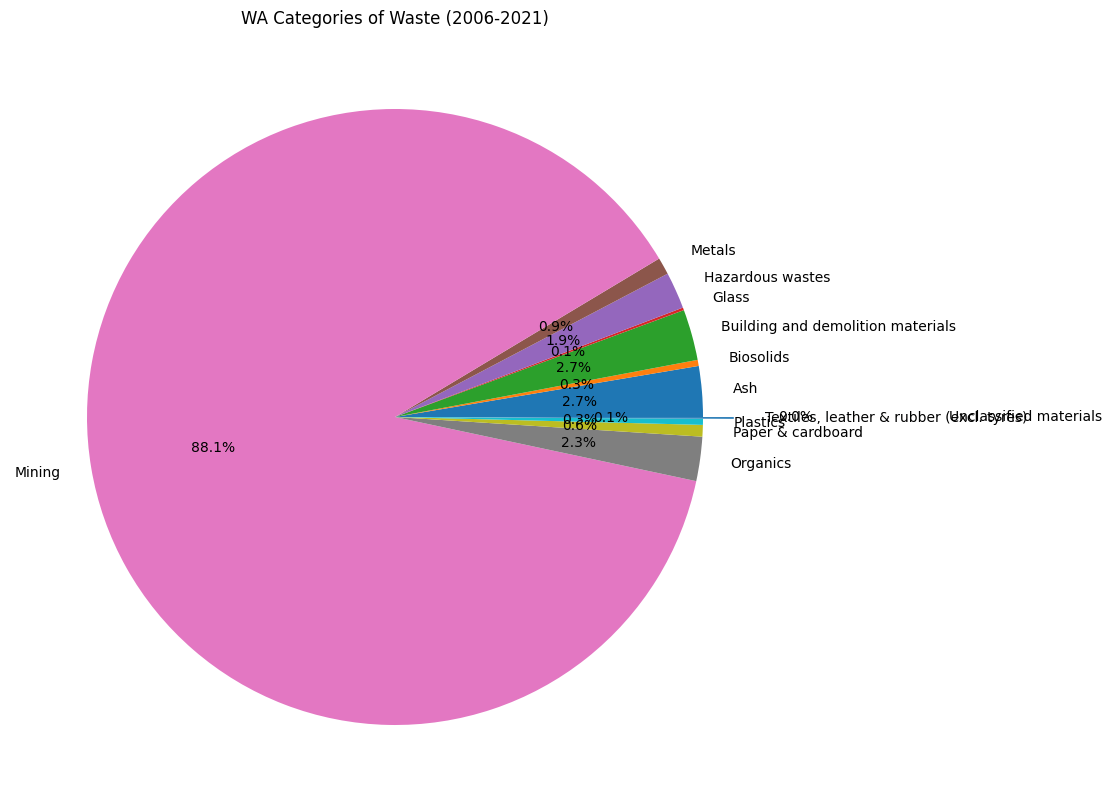

In [ ]:
df = pd.DataFrame(wa_data)
condition = ~((wa_data['Category'] == 'Total'))

wa_data = df[condition]

df_positive = wa_data[wa_data['Tonnes'] >= 0]

if df_positive.empty:
    raise ValueError("No non-negative values available for pie chart")

df_grouped = df_positive.groupby('Category', as_index=False)['Tonnes'].sum()


plt.figure(figsize=(10, 10))

wegdes, texts, autotexts = plt.pie(
    df_grouped['Tonnes'],                      # Data for the pie chart
    labels= df_grouped['Category'],
    autopct="%1.1f%%",
    explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.7)
)


plt.title('WA Categories of Waste (2006-2021)')


plt.show()


Example 2: What type of waste is created by ACT?

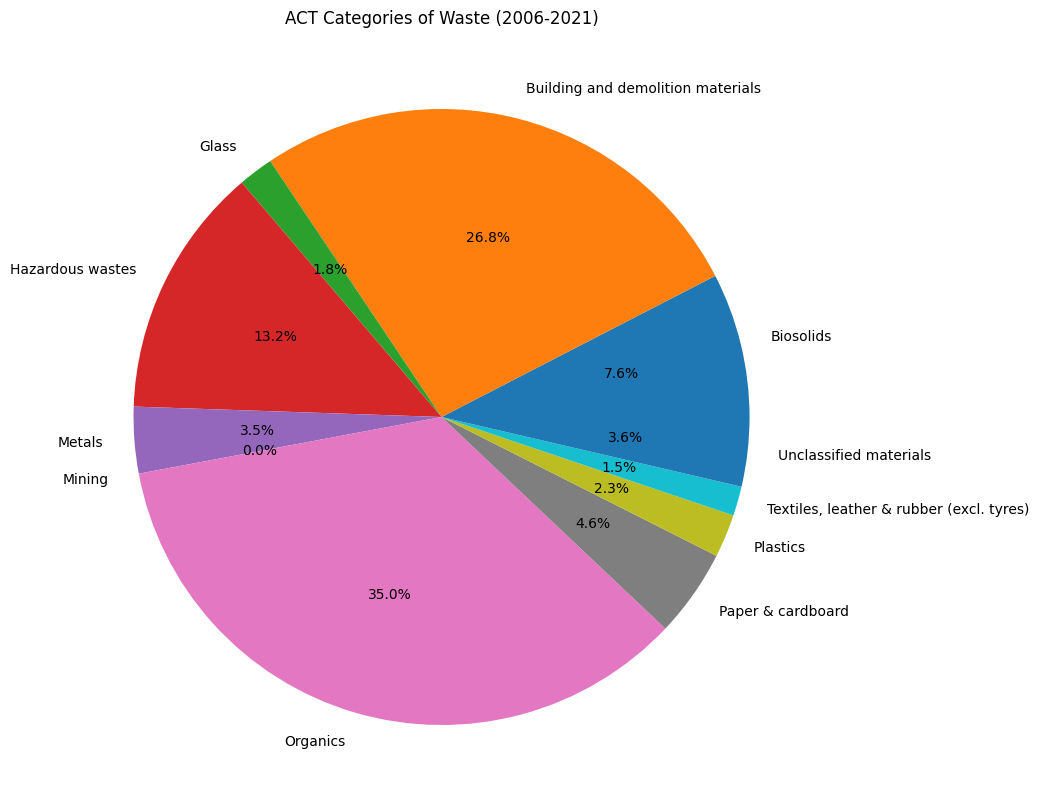

In [88]:
df = pd.DataFrame(act_data)
condition = ~((act_data['Category'] == 'Total'))

act_data = df[condition]

df_positive = act_data[act_data['Tonnes'] >= 0]

if df_positive.empty:
    raise ValueError("No non-negative values available for pie chart")

df_grouped = df_positive.groupby('Category', as_index=False)['Tonnes'].sum()


plt.figure(figsize=(10, 10))

wegdes, texts, autotexts = plt.pie(
    df_grouped['Tonnes'],                      # Data for the pie chart
    labels= df_grouped['Category'],
    autopct="%1.1f%%",
    
)


plt.title('ACT Categories of Waste (2006-2021)')


plt.show()


Here, we see the categories of waste by jurisdiction. Most 

<Axes: xlabel='Jurisdiction'>

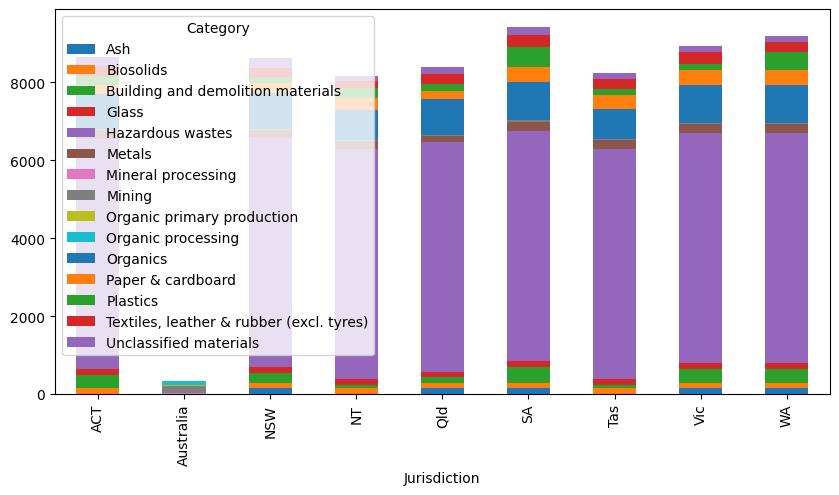

In [ ]:
filtered_waste_df.groupby(['Jurisdiction', 'Category']).size().unstack().plot(kind='bar', stacked=True)

# What about over time?

<Axes: xlabel='year_dt'>

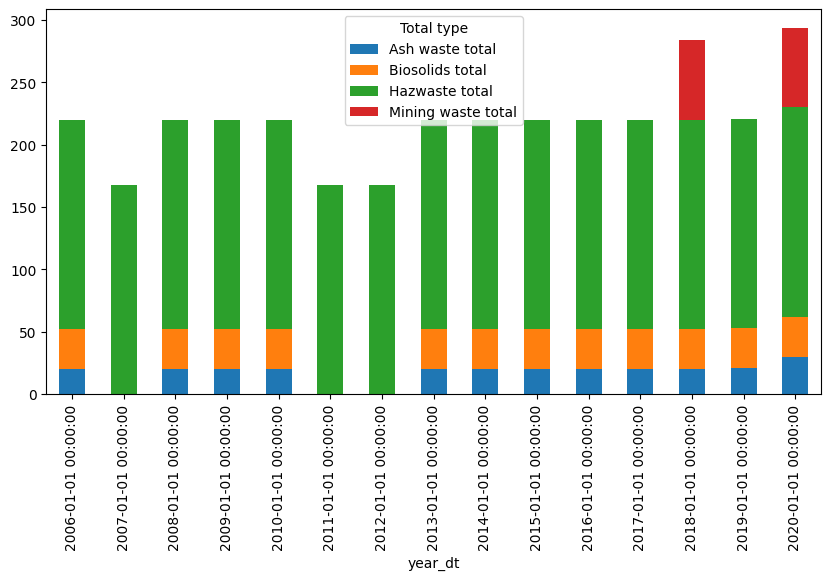

In [46]:
filtered_waste_df.groupby(['year_dt', 'Total type']).size().unstack().plot(kind='bar', stacked=True)

# Example 1: WA

Text(0.5, 1.0, 'Total Types of Waste in WA')

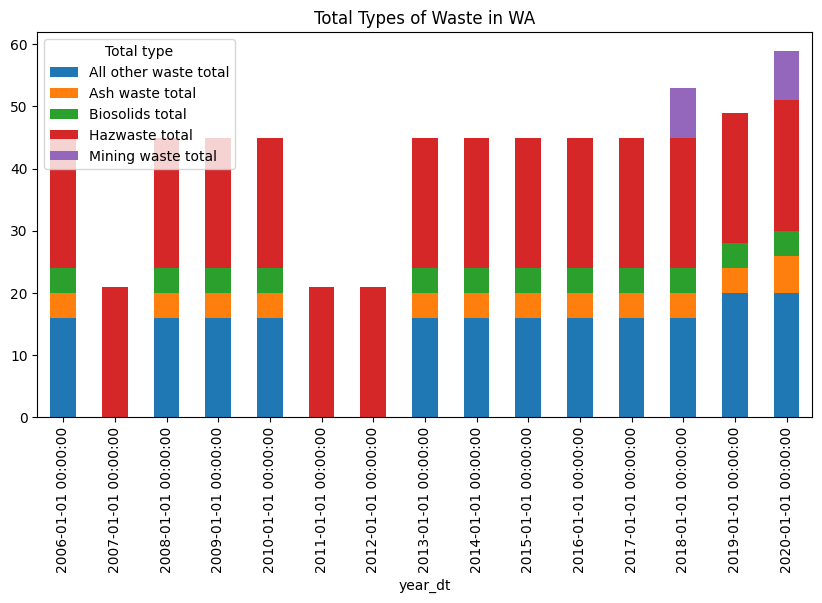

In [90]:
wa_data.groupby(['year_dt', 'Total type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Total Types of Waste in WA')

# Example 2: ACT

Text(0.5, 1.0, 'Total Types of Waste in ACT')

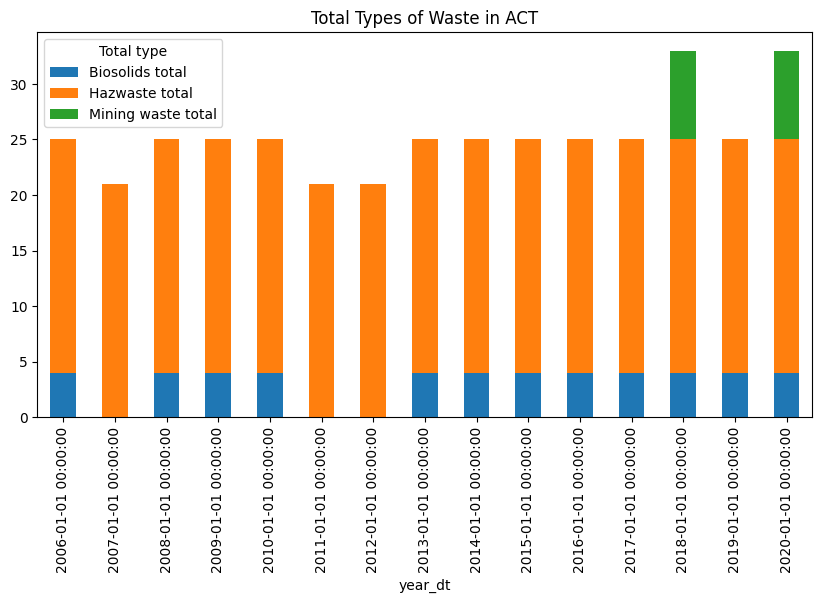

In [93]:
act_data.groupby(['year_dt', 'Total type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Total Types of Waste in ACT')

# Q: Has Waste increased/decreased over the years in Australia?

And when we zoom out onto the whole of Australia, we can see the waste created is stable. Though there are outliers of 2018 and 2020, where there is a massive spike due of wastage.

In [47]:
df = pd.DataFrame(filtered_waste_df)
condition = ~((filtered_waste_df['Category'] == 'Total'))

filtered_waste_df = df[condition]

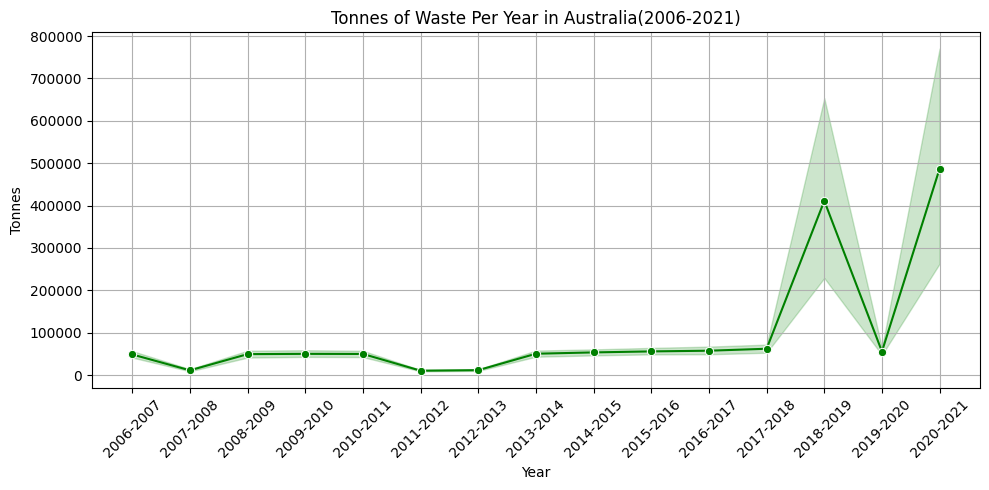

In [48]:
plt.figure()
sns.lineplot(x='Year', y='Tonnes', data=df, marker="o", color='green')
plt.title('Tonnes of Waste Per Year in Australia(2006-2021)')
plt.xlabel('Year')
plt.ylabel('Tonnes')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [157]:
df1 = pd.DataFrame(act_data)
df1 = act_data[(act_data['year_dt'] == '2018-01-01')]

df2 = pd.DataFrame(vic_data)
df2 = vic_data[(vic_data['year_dt'] == '2018-01-01')]

df3 = pd.DataFrame(nsw_data)
df3 = nsw_data[(nsw_data['year_dt'] == '2018-01-01')]

df4 = pd.DataFrame(wa_data)
df4 = wa_data[(wa_data['year_dt'] == '2018-01-01')]
df4_1 = wa_data[(wa_data['year_dt'] == '2020-01-01')]

df5 = pd.DataFrame(sa_data)
df5 = sa_data[(sa_data['year_dt'] == '2018-01-01')]

df6 = pd.DataFrame(tas_data)
df6 = tas_data[(tas_data['year_dt'] == '2018-01-01')]

df7 = pd.DataFrame(nt_data)
df7 = nt_data[(nt_data['year_dt'] == '2018-01-01')]

df8 = pd.DataFrame(qld_data)
df8 = qld_data[(qld_data['year_dt'] == '2018-01-01')]

In [170]:
def two():
    plt.figure(figsize=(1, 1))
    
    df4.groupby(['year_dt', 'Total type']).size().unstack().plot(kind='barh', stacked=True, title= "WA total types of waste (2018)")
    df4_1.groupby(['year_dt', 'Total type']).size().unstack().plot(kind='barh', stacked=True, title= "WA total types of waste (2020)")
    
    plt.tight_layout()

<Figure size 100x100 with 0 Axes>

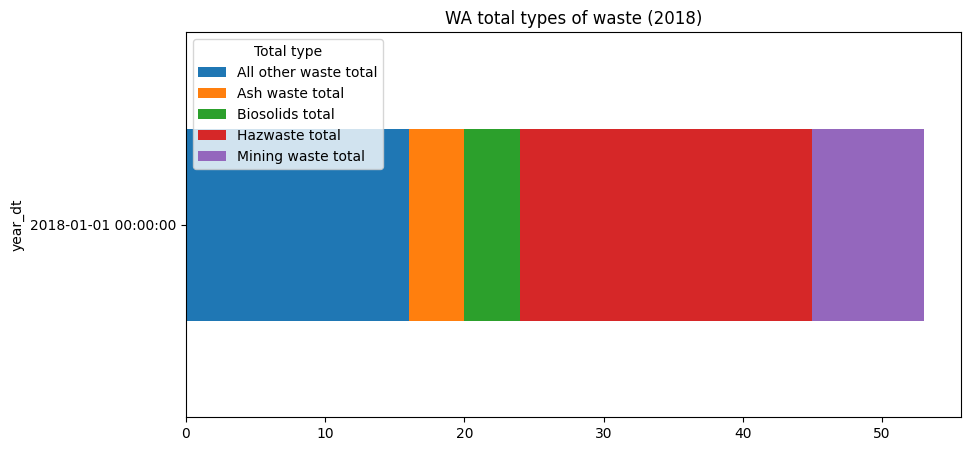

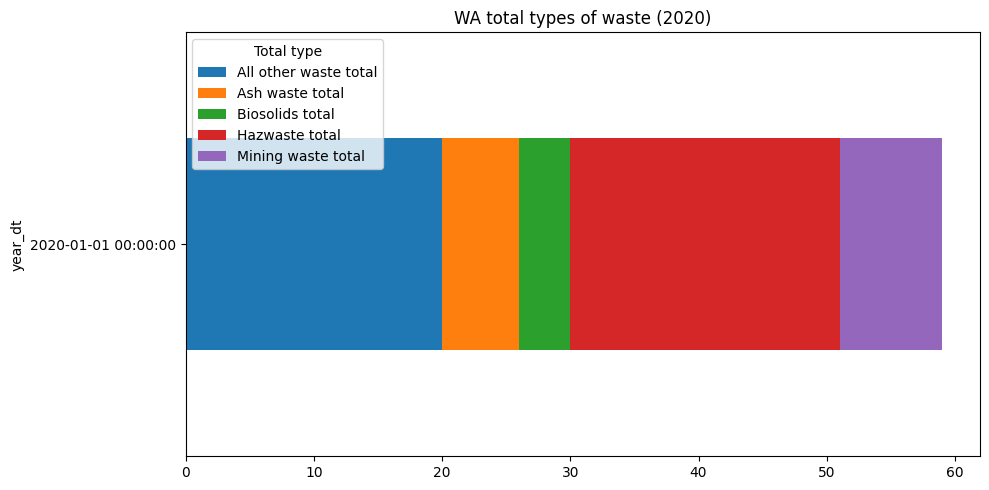

In [171]:
two()

# By Jurisdiction

In [152]:
def Bee():
    plt.figure()

    sns.lineplot(x='year_dt', y='Tonnes', data=act_data, marker="o", color='purple', label='ACT')
    sns.lineplot(x='year_dt', y='Tonnes', data=vic_data, marker="o", color='green', label='VIC')
    sns.lineplot(x='year_dt', y='Tonnes', data=nsw_data, marker="o", color='blue', label='NSW')
    sns.lineplot(x='year_dt', y='Tonnes', data=wa_data, marker="o", color='red', label='WA')
    sns.lineplot(x='year_dt',y='Tonnes', data=sa_data, marker="o", color='orange', label='SA')
    sns.lineplot(x='year_dt', y='Tonnes', data=tas_data, marker="o", color='darkgreen', label='TAS')
    sns.lineplot(x='year_dt', y='Tonnes', data=nt_data, marker="o", color='pink', label='NT')
    sns.lineplot(x='year_dt', y='Tonnes', data=qld_data, marker="o", color='yellow', label='QLD')

    plt.title('Comparision of Waste(ton) Per Year for all Jurisdictions(2013-2020)')
    plt.xlabel('Year')
    plt.ylabel('Tonnes')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    #plt.gca().invert_xaxis()
    plt.tight_layout()

    
    plt.show()
    

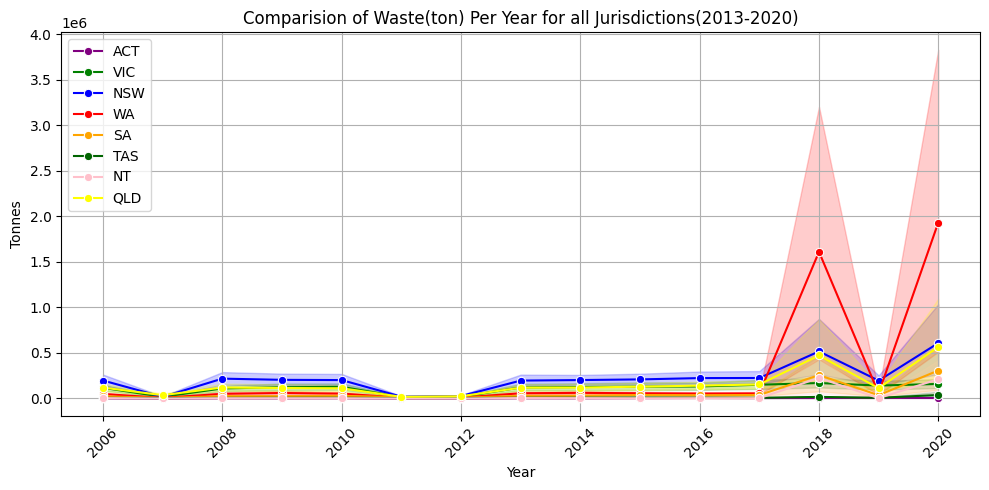

In [153]:
Bee()

# How is all this waste managed?

# WHO is responsible?

We can see most of the waste through the years are quite evenly split between 
1. commercial and industrial (C&I) waste
2. construction and demolition (C&D) waste 

-and a minority from municipal solid waste (MSW) such as households and council operations

<Axes: xlabel='year_dt'>

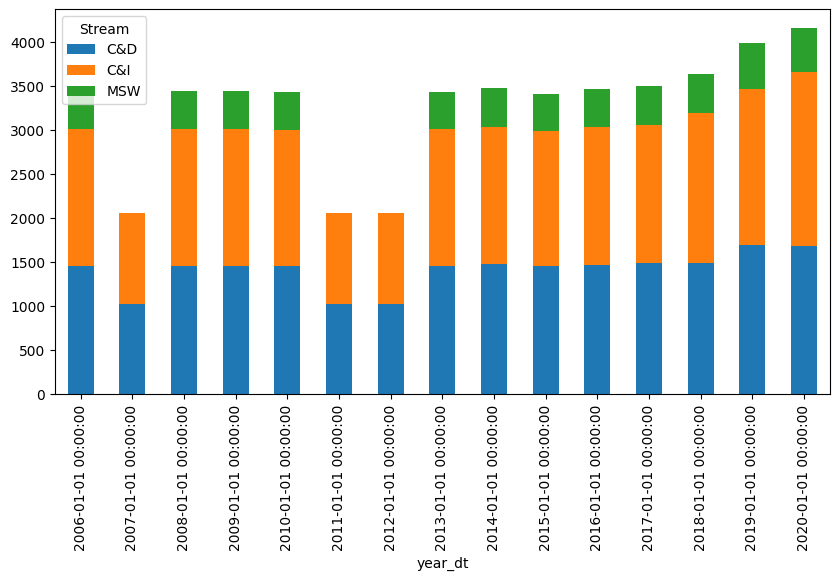

In [ ]:
df = pd.DataFrame(waste_data) 
condition = ~((waste_data['Stream'] == 'Total'))

filtered_waste_df = df[condition]


filtered_waste_df.groupby(['year_dt', 'Stream']).size().unstack().plot(kind='bar', stacked=True)

Here you can see the outcome of management, where the fate of waste is determined. The size of each slice is distributed by tons of waste.

In [ ]:
fig = px.sunburst(
                filtered_waste_df, 
                path = ['Jurisdiction', 'Management', 'Fate'], values= 'Tonnes', 
                height=900,
                title='Management and Fate of Waste for each State/Territory by tons')

fig.show()

To better see the smaller states, here's a sunburst graph where the fate of waste go for each jurisdiction

In [ ]:
fig = px.sunburst(filtered_waste_df, 
                path = ['Jurisdiction', 'Management','Fate'], 
                height=1000,
                title='Top 3 Fates of Waste for each State/Territory')

fig.show()

# Hazardous Wastes

In [25]:
hazardous_wastes_df = filtered_waste_df[filtered_waste_df['Category'] == 'Hazardous wastes']

HW makes 1.9 % of waste in Australia

What does Hazardous wastes include?

<Axes: xlabel='Category'>

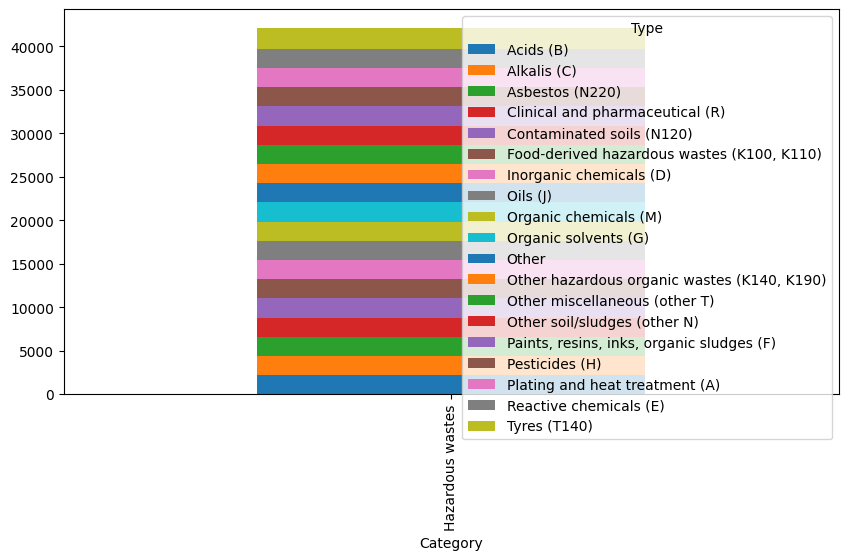

In [32]:
hazardous_wastes_df.groupby(['Category', 'Type']).size().unstack().plot(kind='bar', stacked=True)

Who creates the most hazardous wastes?

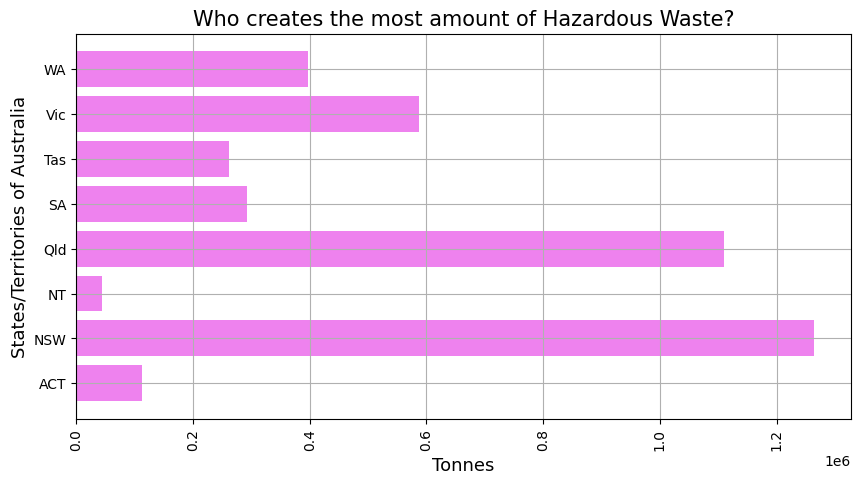

In [ ]:
plt.figure()
plt.barh(hazardous_wastes_df['Jurisdiction'], hazardous_wastes_df['Tonnes'], color='violet')
plt.tick_params(axis='x', labelrotation=90)

plt.title("Who creates the most amount of Hazardous Waste?", fontsize=15)
plt.xlabel("Tonnes", fontsize=13)
plt.ylabel("States/Territories of Australia", fontsize=13)
plt.grid(True)

plt.show()

HW over time in Australia:

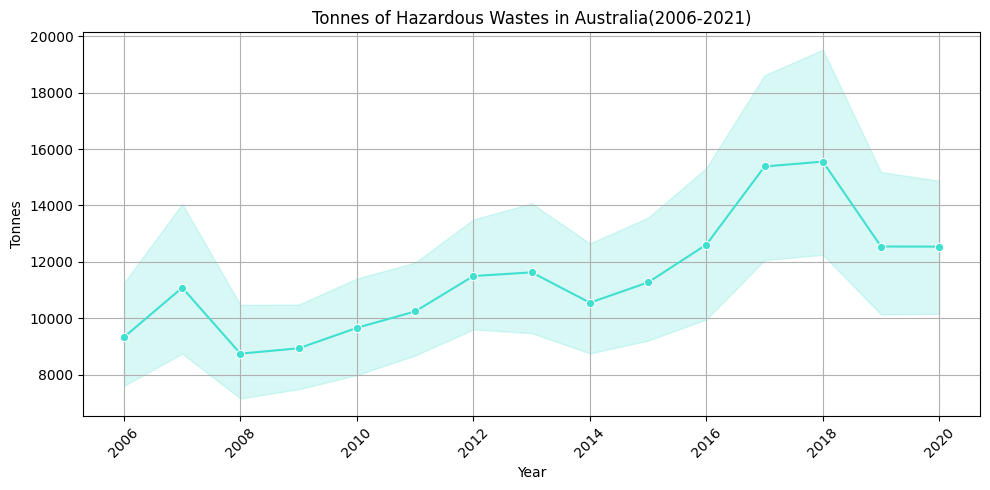

In [ ]:
plt.figure()
sns.lineplot(x='year_dt', y='Tonnes', data=hazardous_wastes_df, marker="o", color='turquoise')
plt.title('Tonnes of Hazardous Wastes in Australia(2006-2021)')
plt.xlabel('Year')
plt.ylabel('Tonnes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Types of waste from HW

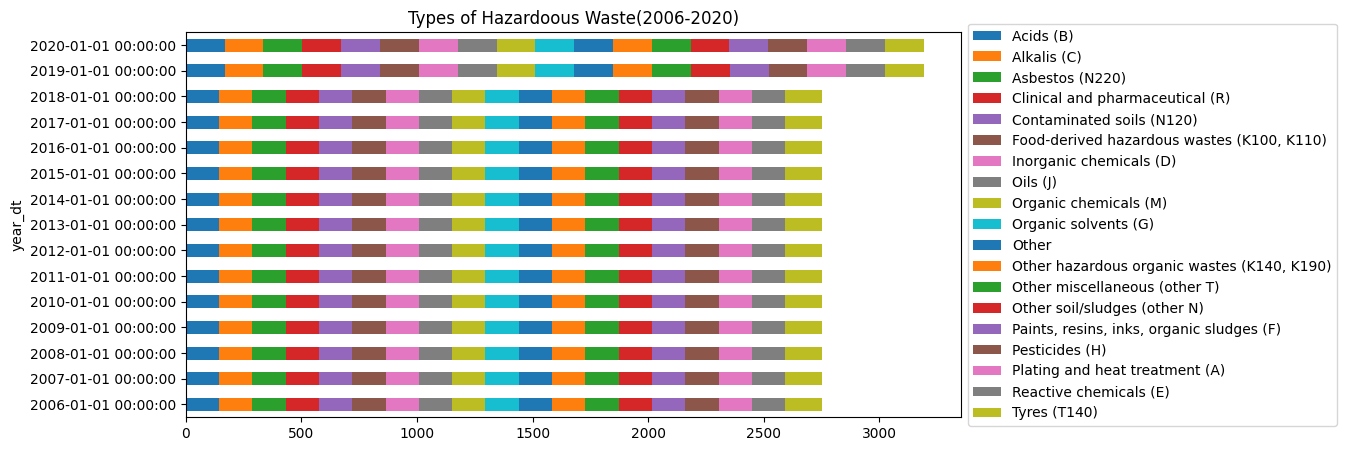

In [ ]:
hazardous_wastes_df.groupby(['year_dt', 'Type']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Types of Hazardous Waste(2006-2020)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Managed by?

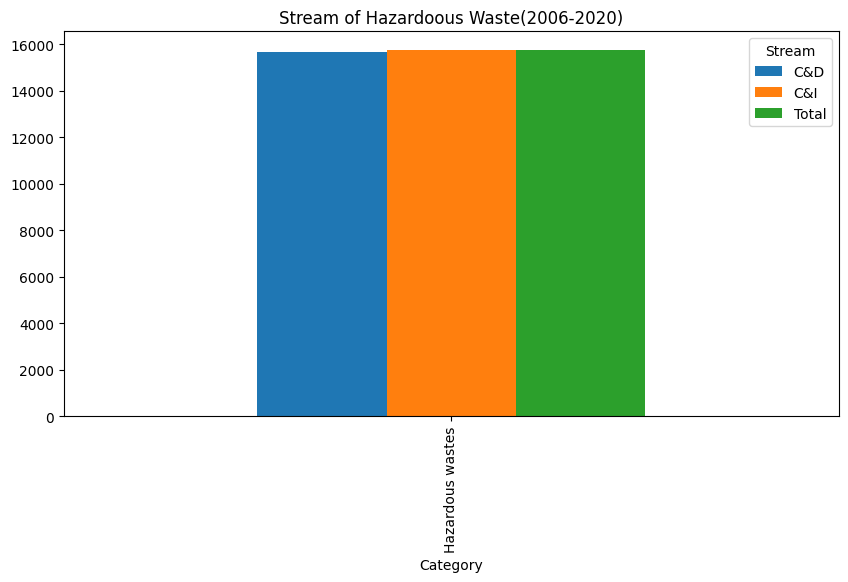

In [ ]:
hazardous_wastes_df.groupby(['Category', 'Stream']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Stream of Hazardoous Waste(2006-2020)')
plt.show()


Stream/Management/Fate sunburst

In [ ]:
df = pd.DataFrame(hazardous_wastes_df)
condition = ~((hazardous_wastes_df['Stream'] == 'Total'))

hazardous_wastes_df = df[condition]

In [ ]:
fig = px.sunburst(hazardous_wastes_df, 
                path = ['Stream', 'Management','Fate'],
                values= 'Tonnes',
                height=1000,
                title='How are Hazardous wastes disposed of?')

fig.show()

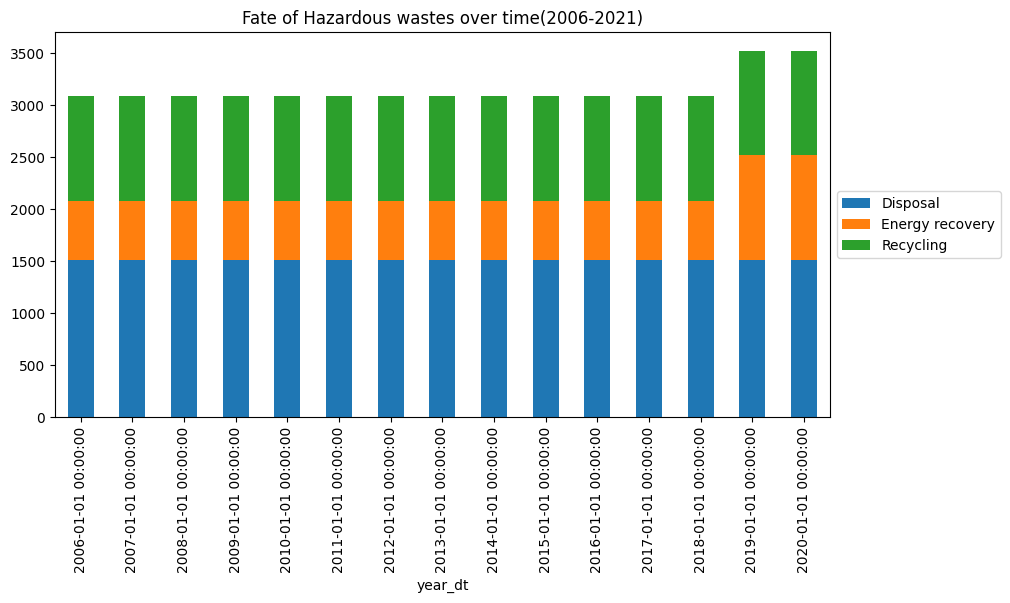

In [36]:
hazardous_wastes_df.groupby(['year_dt', 'Fate']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Fate of Hazardous wastes over time(2006-2021)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()